In [1]:
import pandas as pd

# Read data from CSV file directly
df = pd.read_csv("series.csv") \
  .rename(columns=lambda x: x.strip())

print(df)

    xs  ys1  ys2   ys3
0    0    5    5     5
1    1    9   12    14
2    2   13   25    41
3    3   17   44    98
4    4   21   69   197
5    5   25  100   350
6    6   29  137   569
7    7   33  180   866
8    8   37  229  1253
9    9   41  284  1742
10  10   45  345  2345
11  11   49  412  3074
12  12   53  485  3941


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read data from CSV file directly
# into a pandas DataFrame
df = pd.read_csv("series.csv")

In [4]:
# Melt the DataFrame to long format for rugplot
df_melted = pd.melt(df, id_vars='xs',
  var_name='Category', value_name='Value')

In [5]:
print(df_melted.T)

            0     1     2     3     4     5     6     7     8     9   ...  \
xs           0     1     2     3     4     5     6     7     8     9  ...   
Category   ys1   ys1   ys1   ys1   ys1   ys1   ys1   ys1   ys1   ys1  ...   
Value        5     9    13    17    21    25    29    33    37    41  ...   

            29    30    31    32    33    34    35    36    37    38  
xs           3     4     5     6     7     8     9    10    11    12  
Category   ys3   ys3   ys3   ys3   ys3   ys3   ys3   ys3   ys3   ys3  
Value       98   197   350   569   866  1253  1742  2345  3074  3941  

[3 rows x 39 columns]


In [6]:
# Set the style of seaborn
sns.set_style("ticks")

In [7]:
# Define a color palette for the rug plots
# Use one less color for 'xs'
palette = sns.color_palette(
  "husl", len(df.columns) - 1) 

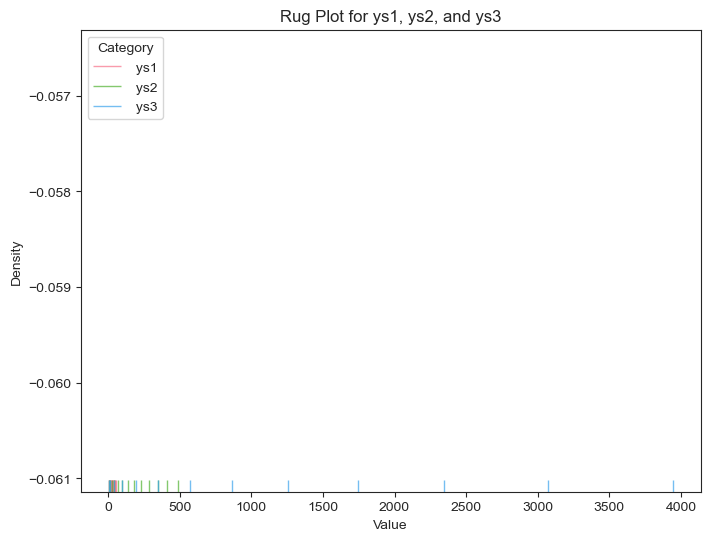

In [8]:
# Create rug plot for each category
plt.figure(figsize=(8, 6))

# Exclude 'xs' column
for i, col in enumerate(df.columns[1:]):
  df_subset = df_melted[df_melted['Category'] == col]
  sns.rugplot(data=df_subset, x='Value',
    color=palette[i], label=col, alpha=0.7)

# Add title and labels
plt.title('Rug Plot for ys1, ys2, and ys3')
plt.xlabel('Value')
plt.ylabel('Density')

# Add legend
plt.legend(title='Category', loc='upper left')